## Frequency fitting
Showing the $T^{-3}$ behavior.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin

In [ ]:
omega_true = 1.5
noise = 2.0

def fit_one(N):
    x = np.arange(N)
    theory = lambda omega : np.sin(x*omega)
    y =theory(omega_true)+np.random.normal(0,noise,N)
    omega = fmin(lambda omega: ((y-theory(omega))**2).sum(),omega_true,disp=False)
    return omega

In [ ]:
Ntrials = 300
err_at_N = lambda N : np.sqrt(((np.array([fit_one(N) for i in range(Ntrials)])-omega_true)**2).mean())

In [ ]:
Narr = np.logspace(0.5,4,20).astype(int)
err = [err_at_N(N) for N in Narr]

In [ ]:
theory_err = (Narr**3/(6*noise**2))**(-1/2)

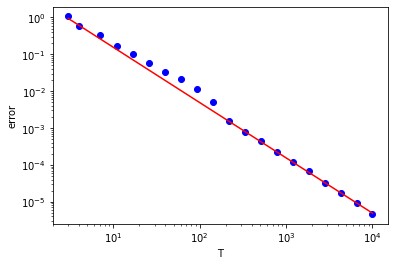

In [ ]:
plt.plot(Narr,err,'bo')
plt.plot(Narr,theory_err,'r-')
plt.semilogx()
plt.semilogy()
plt.xlabel("T")
plt.ylabel("error")
None